pandas is a data processing library for python.  It excels at allowing you to research and manipulate tabular data with some easy functions.  I've taken the data from the kaggle [titanic problem](https://www.kaggle.com/c/titanic/data) to illustrate some of the useful features of pandas.


In [2]:
import pandas as pd
traindf = pd.read_csv("train.csv")
type(traindf)

pandas.core.frame.DataFrame

In [3]:
traindf.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


you can see the number of rows and columns by using the shape command

In [4]:
traindf.shape

(891, 12)

In [5]:
s1 = traindf['Cabin']
type(s1)

pandas.core.series.Series

In [6]:
survived = traindf.groupby('Survived').count()
survived.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [7]:
type(survived)

pandas.core.frame.DataFrame

Look carefully at the survival counts.  some columns have less data that we would expect.  This is because those columns have null or 'NaN' data, indicating that this data is missing.  We can use pandas to explore missing data a little. below we list the number of NaNs by column:

## Dealing With Missing Data

In [8]:
nulldf = traindf.isnull() #create a data frame of the Nan truth values
nulldf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [9]:
nulldf.sum(axis=0) #check how many Nans in the data set in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling missing data is an important first step in cleaning training data.  With each column, we should decide what we want to do when data is missing.  we have a number of choices:
* We can leave the NaN data alone.  Basically ignore it.  
* We can remove the rows that contain null data in one of the columns of the row.
* We can remove an enitire column if that column has missing data
* We can find a way to replace the missing data with a default or a guess of what the missing data should be.
* We can reinterpret the column (possiblyusing other data in the row

How do we decide which of these to do?  It depends on the type of data that is missing, how much is missing, and how important that data is for solving the problem.  Notice that the first three options are pretty easy.  If possible, these methods are the ones that we will use.  If the data is really important for training, we will try to fit some default value or prediction of the values in the missing cells.

We will check each column with missing data to figure out what to do:

### Age
The Age column is missing in 177 rows.  This is 20% of the rows in the training set, a pretty significant amount of the data.  We'd probably like to keep all those rows in the set, but maybe we don't need the column.  Since we are going to train a model to predict survival, age may be an important attribute so is there a way to potentially fill in these missing values or reinterpret the column into something more predictable?  

We want to guess the values only if we can make an argument that it will increase the predictive power of our model.  Otherwise it's a waste of effort.  We'll come back to the idea of model improvement later.  For now we are going to simply remove this column.  

In [10]:
mod1df = traindf.ix[:, traindf.columns != 'Age']
mod1df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


### Cabin
The cabin column has 687 missing cells, 77% of the rows.  As with the Age column, we will remove it for now.

In [11]:
mod2df = traindf.drop(['Age', 'Cabin'], axis=1)
mod2df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


### Embarked
There are two missing cells in the Embarked column.  In this case we will just remove the rows as it doesn't affect the size of the training set materially.

In [12]:
mod3df = traindf.drop(['Age', 'Cabin'], axis=1).dropna(axis=0)
mod3df.isnull().sum(axis=0) #check how many Nans in the data set in each column

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
mod3df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


## Handling Categorical Data
Our goal is to classify each individual (row) based on survival likelihood.  Many machine learning methods require that the columns be number or, even better, binary values.  Below, we expand the 'Pclass', 'Sex', and 'Embarked' columns into dummy columns so that we have binary results for each of the values in each of these rows.


In [14]:
mod4df = pd.get_dummies(mod3df, columns=['Pclass', 'Sex', 'Embarked'])
mod4df.head()

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0,0,1,0,1,0,0,1


In [15]:
mod5df = mod4df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
mod5df.head()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


## Grouping Numerical Data (Fare)
The `Fare` column has lots of different values in it.  Sometimes we can improve the inference of a classifier by creating categories for continuous numbers grouping (or binning) the values into each category.  pandas provides the `cut` operation for binning continuous data.

The binning below is just an example.  usually before binning, we will perform some analysis on the column to determine the best boundaries for binning.  The bin boudaries shown below are deteremined by eyballing the data and should be considered examples only.

Once the data has been binned, we can expand the column as we did with the other categorical data.

In [16]:
bins = [0, 30, 80, 1000]
names = ['Cheap', 'Normal', 'Expensive']

mod5df['TicketCost'] = pd.cut(mod5df.Fare, bins, labels=names)
mod5df = pd.get_dummies(mod5df, columns = ['TicketCost'])
mod5df.head()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,TicketCost_Cheap,TicketCost_Normal,TicketCost_Expensive
0,0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0,0
1,1,1,0,71.2833,1,0,0,1,0,1,0,0,0,1,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1,1,0,0
3,1,1,0,53.1000,1,0,0,1,0,0,0,1,0,1,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0,0


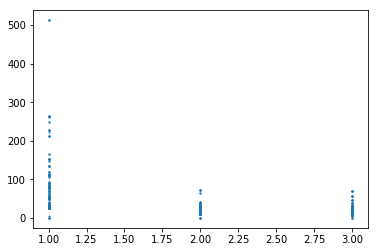

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(mod3df['Pclass'], mod3df['Fare'], s=1)
plt.show()

Below is an example of trying to create more precise bins of the Fare using cut.  it appears that the range of Fares overlaps significantly.  This might make it difficult to get useful classifications that depend on both Pclass and Fare.

In [18]:
#bins = [int(i) for i in xrange(0, int(mod3df.Fare.max()+1), int(mod3df.Fare.max()+1)/6)]
bins = [0,30,80,1000]
cuts,cats = pd.cut(mod3df.Fare, bins, retbins=True)
cuts
x = pd.crosstab(index=mod3df['Pclass'], columns=cuts)
x

Fare,"(0, 30]","(30, 80]","(80, 1000]"
Pclass,,,
1,42,93,74
2,154,24,0
3,446,41,0


Since we can't separate this data well, we are going to remove it for now.

In [19]:
mod6df = mod5df.drop(['Fare'], axis = 1)
mod6df.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,TicketCost_Cheap,TicketCost_Normal,TicketCost_Expensive
0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
1,1,1,0,1,0,0,1,0,1,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,0,1,1,0,0
3,1,1,0,1,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,1,0,1,0,0,1,1,0,0


## A Quick Model from The Titanic Data
Now that we have a simple data set, let's look at an example logistic model of survival against all the data.

In [20]:
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# encapsulate all the data preprocessing to run against the test data
def preProcessPredictionData(df):
    newdf = df.drop(['Age', 'Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis=1).dropna(axis=0)
    return pd.get_dummies(newdf, columns=['Pclass', 'Sex', 'Embarked'])

# get our data and prepare it
df = preProcessPredictionData(pd.read_csv('train.csv'))
y,X = dmatrices('Survived ~ SibSp + Parch + Pclass_1 + Pclass_2 + Pclass_2 + Sex_female + Sex_male + ' +
                'Embarked_C + Embarked_Q + Embarked_S', 
                df, return_type="dataframe")
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# create a logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test) # check accuracy against the test data

0.7303370786516854

## Comparing Models
In the next stage of developing a model, we can use the prepared data and the tools from scikit-learn to experiment with model data and try to improve the model.  scikit-learn provides a number of algorithms for learning models and predicting.  We can also apply the pandas output to other modeling platforms like Keras and pyTorch.

We started above with a very simple linear model.  Simple models can provide us with a benchmark so that, as we modify the data or the model contents, we have something to compare to.

So, starting with 80% accuracy, how can I change model data to improve the model?  Let's put the Fare categories back in the data and see if that increases or reduces accuracy.

In [21]:
def preProcessPredictionData2(bins, df):
    names = ['Cheap', 'Normal', 'Expensive']
    df['TicketCost'] = pd.cut(df.Fare, bins, labels=names)
    newdf = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked', 'TicketCost'])
    newdf = newdf.drop(['Age', 'Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis=1).dropna(axis=0)
    return newdf

# get our data and prepare it
bins = [0, 30, 80, 1000]
df = preProcessPredictionData2(bins, pd.read_csv('train.csv'))
y,X = dmatrices('Survived ~ SibSp + Parch + Pclass_1 + Pclass_2 + Pclass_2 + Sex_female + Sex_male + ' +
                'Embarked_C + Embarked_Q + Embarked_S + TicketCost_Cheap + TicketCost_Normal + TicketCost_Expensive', 
                df, return_type="dataframe")
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# create a logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test) # check accuracy against the test data

0.7988826815642458

So adding the categorical price to the data set appears to materially improve the accuracy of the model.  Lets remove the SibSp and Parch fields and see if that improves the model.

In [22]:
y,X = dmatrices('Survived ~ Pclass_1 + Pclass_2 + Pclass_2 + Sex_female + Sex_male + ' +
                'Embarked_C + Embarked_Q + Embarked_S + TicketCost_Cheap + TicketCost_Normal + TicketCost_Expensive', 
                df, return_type="dataframe")
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# create a logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test) # check accuracy against the test data

0.78212290502793291

Removing that data made the accuracy of the model marginally worse.  Lets try removing more stuff and see what happens.

In [23]:
y,X = dmatrices('Survived ~ Pclass_1 + Pclass_2 + Pclass_2 + Sex_female + Sex_male + ' +
                'TicketCost_Cheap + TicketCost_Normal + TicketCost_Expensive', 
                df, return_type="dataframe")
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# create a logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test) # check accuracy against the test data

0.78770949720670391

Removing embarkation info slightly improves accuracy.

In [24]:
y,X = dmatrices('Survived ~ Pclass_1 + Pclass_2 + Pclass_2 + Sex_female + Sex_male', 
                df, return_type="dataframe")
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# create a logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test) # check accuracy against the test data

0.78770949720670391

Interestingly, it now appears that removing the ticket cost info does not materially impact the model when it is built off of just the passenger class and the passenger gender.

## Plots to Help With Discovering Dependencies


Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1065e1990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1072ce090>]], dtype=object)

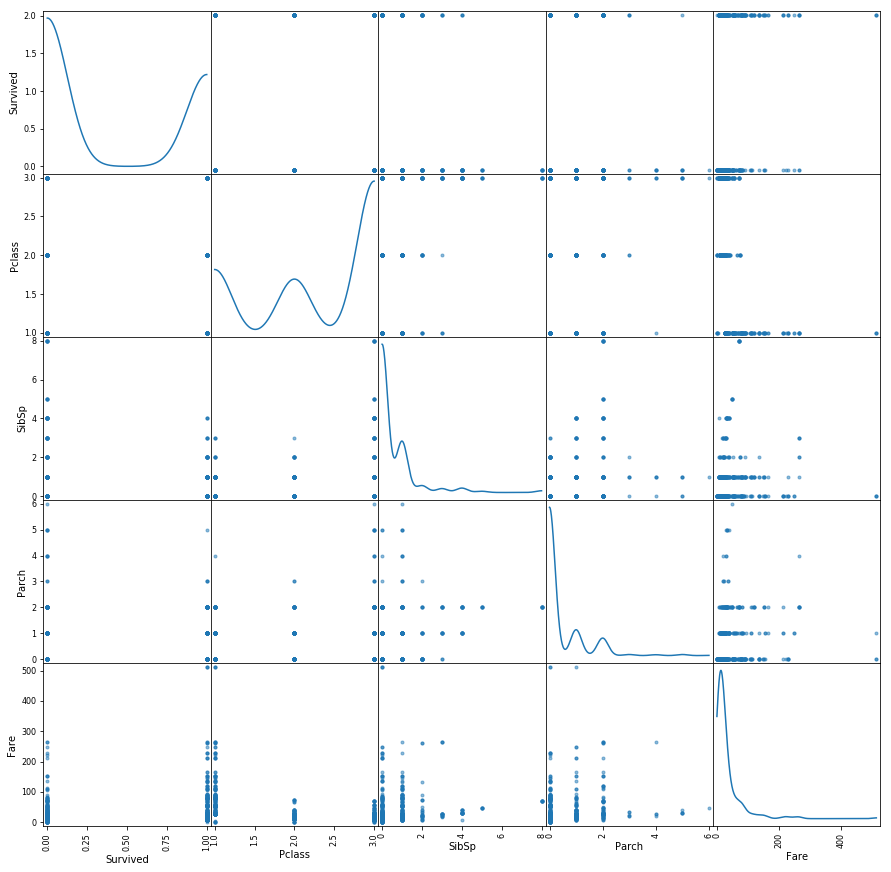

In [25]:
%pylab inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
test = pd.read_csv('train.csv')
test = test.drop(['Age', 'Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1).dropna(axis=0)
scatter_matrix(test, figsize=(15,15), diagonal='kde')

The above example is a set of scatter diagrams pairing each of the Titanic data columns with each other.  There is not much evidence of dependent data in this set.  